In [1]:
%pip install -r requirements.txt;

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt;'


##  Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

## Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop("Unnamed: 32", axis=1, inplace = True)
data.drop("id", axis=1, inplace = True)

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis (EDA)

In [8]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


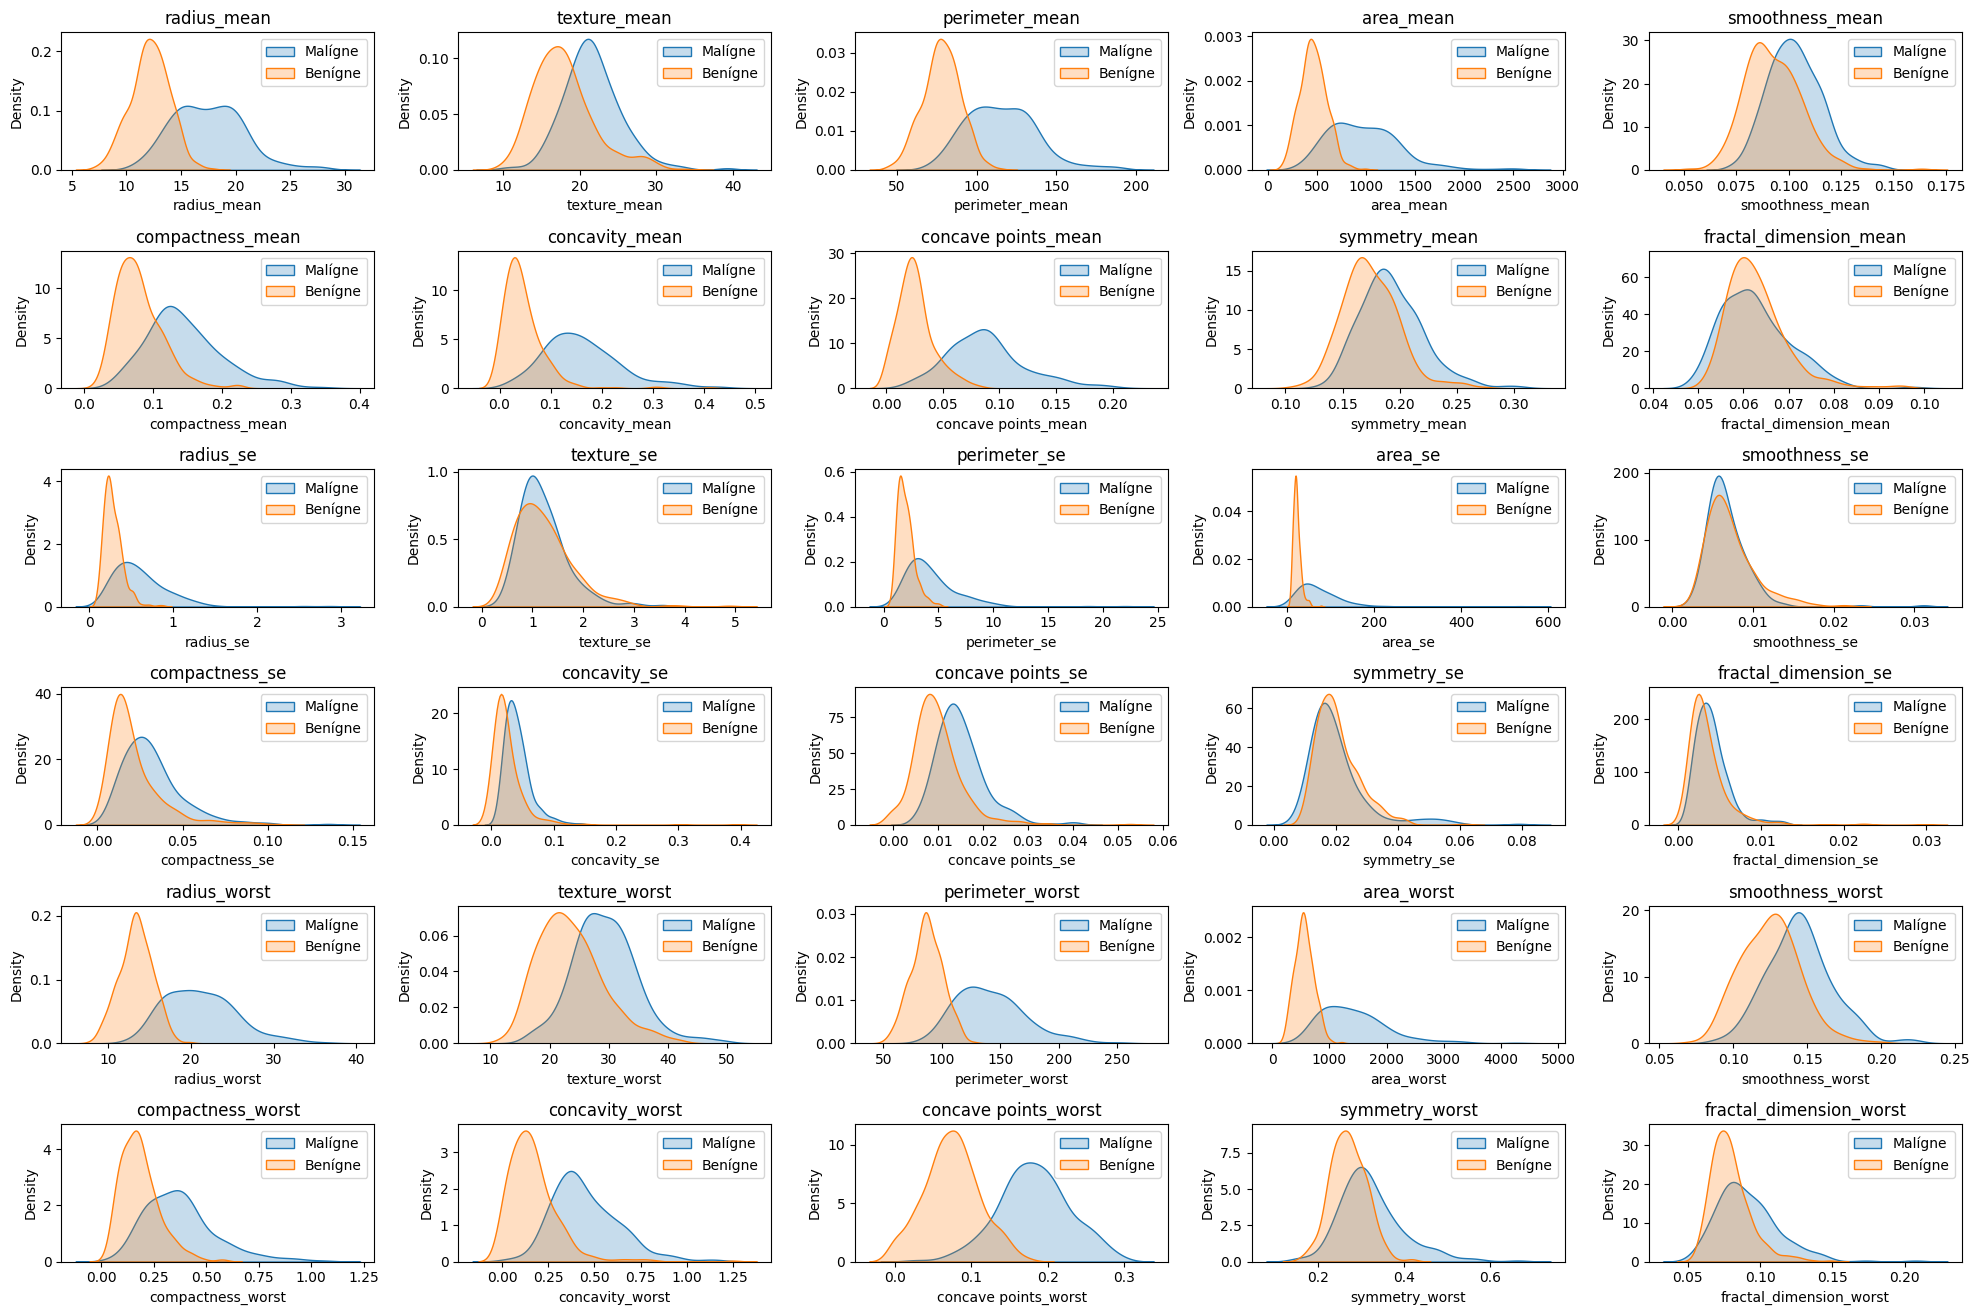

In [56]:
columns_to_plot = data.columns.drop("diagnosis")

plt.figure(figsize=(20, 15))
plotnumber = 1
num_columns = 5  

for column in columns_to_plot:
    plt.subplot(len(columns_to_plot) // num_columns + 1, num_columns, plotnumber)
    sns.kdeplot(data[data['diagnosis'] == 1][column], label='Malígne', fill=True)
    sns.kdeplot(data[data['diagnosis'] == 0][column], label='Benígne', fill=True)
    plt.title(f'{column}')
    plt.legend()
    plotnumber += 1

plt.tight_layout() 
plt.show()


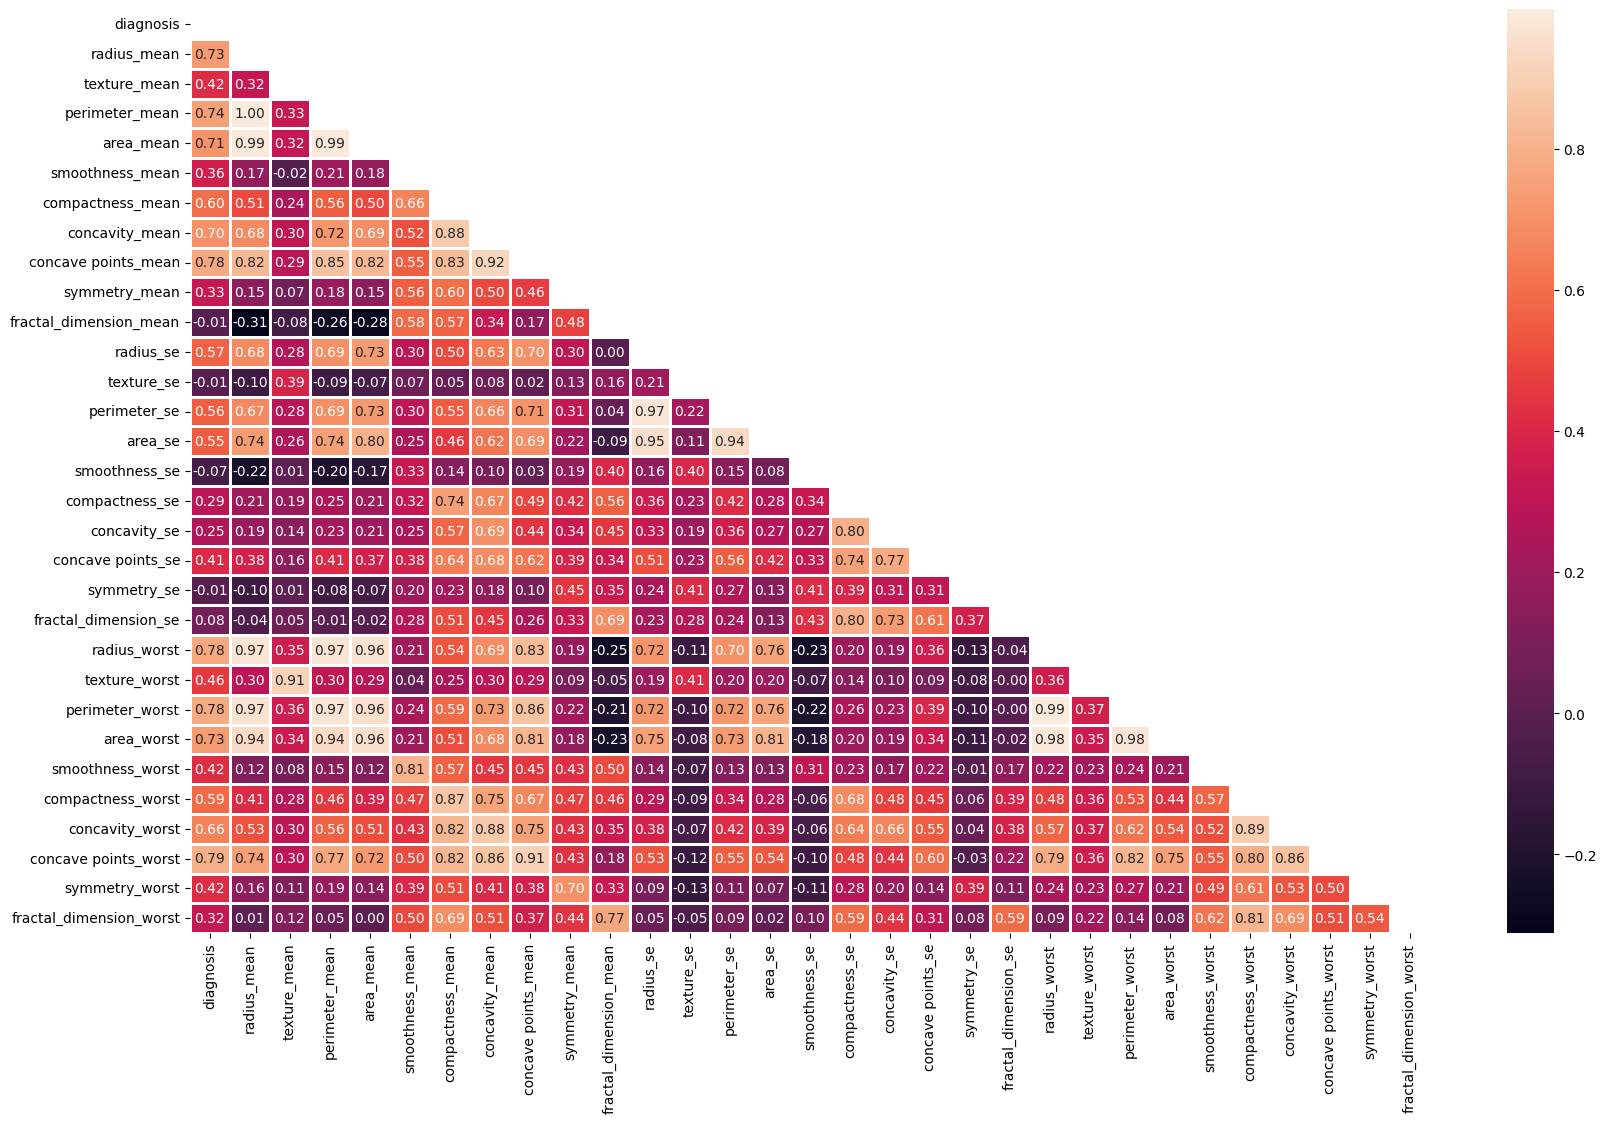

In [10]:
plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

## MODELy a jejich stavba

In [17]:
#reset modelu na základní datasetu
#zaloha_dat = data
#data = zaloha_dat

Začnu běžnou logistickou regresí, protože je to vhodná metoda, která využívá dichotomie závislé proměnné - u nás tedy rozdělení na Maligní a Benigní nádor. Tímto pouze natrénuji model abych viděl, zda je podobnost

In [97]:
#Importy základních nástrojů
#preprocessing pro TEST train split klasický
from sklearn.model_selection import train_test_split

In [98]:
#Rozdělím si dataset na Y (Diagnóza pro train) a X (featury)

X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

In [99]:
#Klasická stavba modelu při rozdělení na TRAIN a test - základní rozdělení
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [118]:
#Jak to vypadá
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [69]:
#Data potřebujeme anebo nepotřebujeme naškálovat a standardizovat

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
#Začnu logistickou regresí
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [81]:
# Logistická regrese model
model = LogisticRegression(max_iter=10000)

In [82]:
#Trénování modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [83]:
# Predikce
y_pred = model.predict(X_test)

In [101]:
# Jaká je přesnost modelu
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(accuracy)
print(classification_report_str)

0.9680851063829787
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.94      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



MODEL Logistické regrese je nevhodný

## Unsupervised learning modely

Clustering

K-means - budu hledat shluky maligních a benigních nádorů - tedy rozdělení na dvě skupiny
Silueta

In [106]:
data = zaloha_dat

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [110]:
# Oddělení Featury od targetu
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [111]:
#Standardizace dat features
X_scaled = StandardScaler().fit_transform(X)

In [113]:
# Hledáme dva clustery
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster labels
cluster_labels = kmeans.labels_

In [155]:
# Compare the clusters with the actual diagnosis using a confusion matrix
conf_matrix = confusion_matrix(y, cluster_labels)
conf_matrix

array([[ 13, 344],
       [175,  37]])

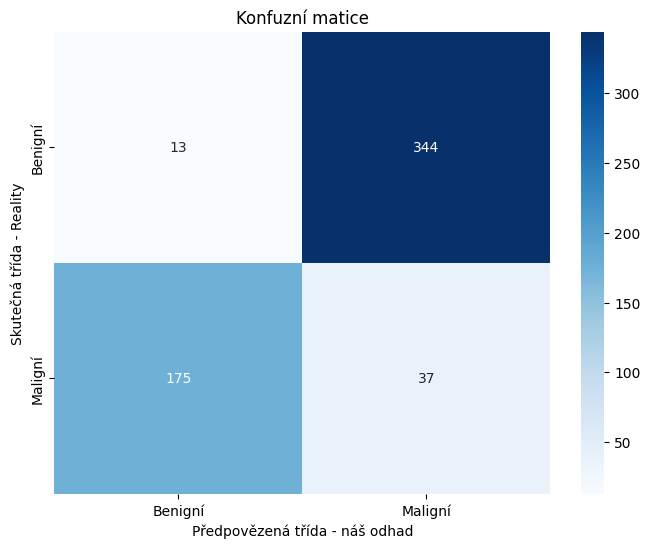

In [156]:
# Například: conf_matrix = np.array([[10, 2], [1, 5]])

conf_matrix = confusion_matrix(y, cluster_labels)

# Názvy tříd pro osy, případně upravte podle svých potřeb
class_names = ['Benigní', 'Maligní']

# Vytvoření heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Přidání titulků a popisků os
plt.title('Konfuzní matice')
plt.ylabel('Skutečná třída - Reality')
plt.xlabel('Předpovězená třída - náš odhad')

# Zobrazit graf
plt.show()

TOTÁLNĚ Špatně - podle konfusion matrixu jsme odhadem zcela špatně

Dimensinální redukce

PCA - pro vizualizační modely

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [116]:
# Apply PCA to reduce the dataset to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


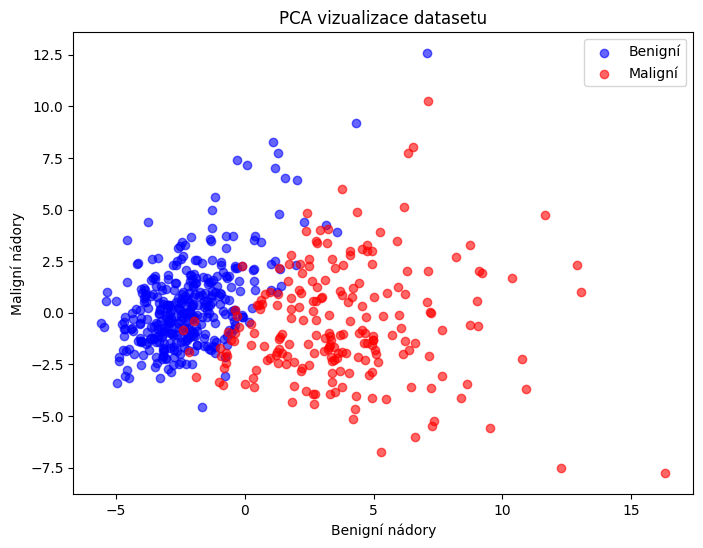

In [117]:
# Graf s 2 hodnotami
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Benigní', alpha=0.6, c='b')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Maligní', alpha=0.6, c='r')
plt.title('PCA vizualizace datasetu')
plt.xlabel('Benigní nádory')
plt.ylabel('Maligní nádory')
plt.legend()
plt.show()

Detekce anomálií 

SVM - Vyberu hranice dat a pokračuji s klasifikací benigních a maligních dat.

In [146]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [147]:
# Iniciace SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Trénink SVM modelu
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [150]:
#hyperparametr tuning
svm_model2 = SVC(kernel='poly', degree=3)
# Trénink SVM modelu verze 2
svm_model2.fit(X_train, y_train)

SVC(kernel='poly')

In [148]:
# Predikce na testovacích datech
y_pred_svm = svm_model.predict(X_test)

In [151]:
# Predikce na testovacích datech verze 2
y_pred_svm2 = svm_model2.predict(X_test)

In [149]:
# Přesnost modelu a report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
# Výsledek
print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{classification_report_svm}")

Accuracy: 0.9574468085106383
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [153]:
# Přesnost modelu a report VERZE 2
accuracy_svm2 = accuracy_score(y_test, y_pred_svm2)
classification_report_svm2 = classification_report(y_test, y_pred_svm2)
# Výsledek
print(f"Accuracy: {accuracy_svm2}")
print(f"Classification Report:\n{classification_report_svm2}")

Accuracy: 0.9414893617021277
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       121
           1       0.98      0.85      0.91        67

    accuracy                           0.94       188
   macro avg       0.95      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



RANDOM FOREST - test

In [158]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [159]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [161]:
# Evaluate the model's accuracy and classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf)
print(classification_report_rf)

0.9627659574468085
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.97      0.93      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



## Neuronová síť